<a href="https://colab.research.google.com/github/Deendayal6265/Machine-Learning-Algorithms/blob/main/House%20price%20Prediction%20Project%20For%20DevTown/Projcet_House_Price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project House Price Prediction**

1.  By- Deendayal jatav
2.   To - DevTown



Import Required Library. 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")

In [ ]:
data.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.price.count()

545

# **Convert data string to numerical**

In our dataset many of the columns are in string so we need to convert it into numerical value. 

like mainroom, guestroom etc . 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.mainroad =le.fit_transform(data.mainroad)
data.guestroom = le.fit_transform(data.guestroom)
data.basement = le.fit_transform(data.basement)
data.hotwaterheating = le.fit_transform(data.hotwaterheating)
data.airconditioning = le.fit_transform(data.airconditioning)
data.prefarea = le.fit_transform(data.prefarea)
data.furnishingstatus = le.fit_transform(data.furnishingstatus)

# **All the coloumns are changed in the numerical values**

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
data.dropna()  # this remove those row who have null value. 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


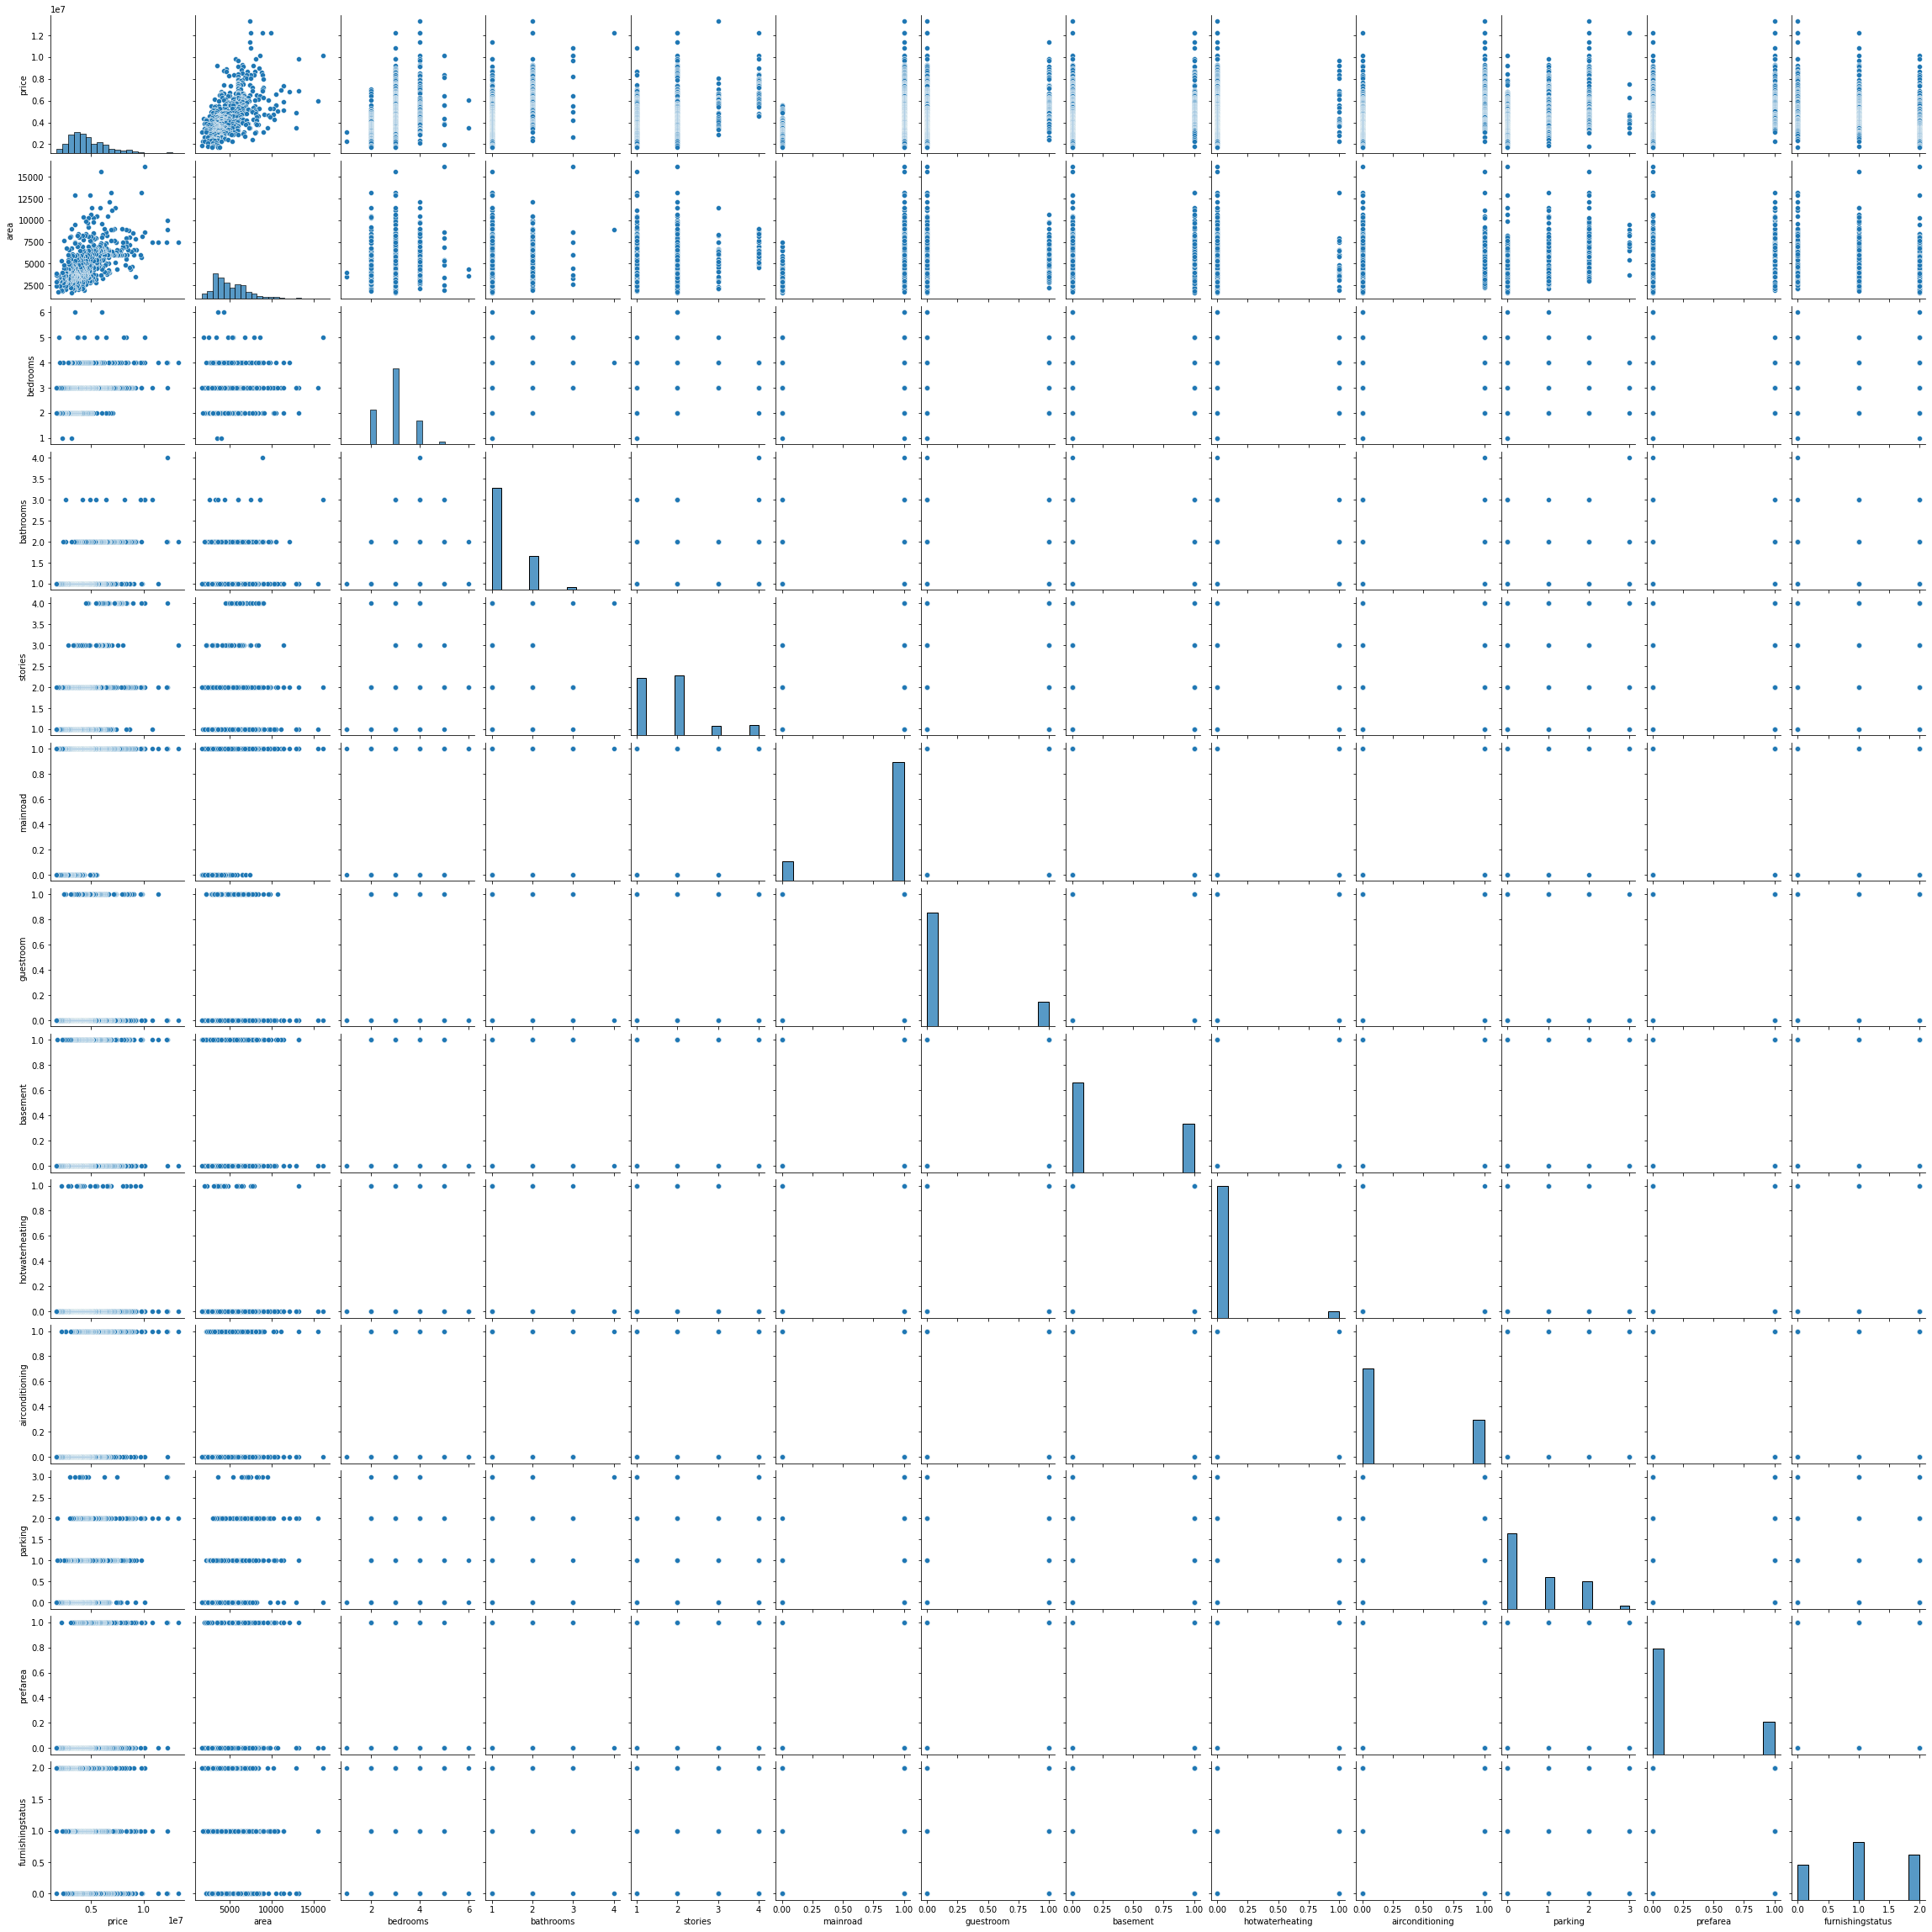

In [ ]:
sns.pairplot(data)

In [ ]:
x = data.iloc[:,1:]

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y = data.iloc[:,0:1]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
print("shape od the x :",x.shape)
print("shape od the y :",y.shape)

shape od the x : (545, 12)
shape od the y : (545, 1)


# **Split the dataset into training or tesiting data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=.30)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(381, 12)
(381, 1)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(164, 12)
(164, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[6291567.10996267],
       [6390833.34559335],
       [6529768.57506301],
       [5564502.04961418],
       [4230599.25468818],
       [2914883.15196702],
       [2697427.73058359],
       [7414579.03096575],
       [2418919.9186991 ],
       [4441524.75205456],
       [3884060.72286849],
       [3622055.70318037],
       [4715571.50803798],
       [4646603.24223929],
       [5339291.00510066],
       [7883440.82703792],
       [4240649.49120762],
       [3506117.60103707],
       [6628569.39661572],
       [2724491.51868965],
       [4493770.53914979],
       [5250831.27677531],
       [5132091.19114307],
       [3465638.23219598],
       [5495990.74603413],
       [6960410.36950925],
       [2839348.31972912],
       [7452682.40876644],
       [7546627.45107945],
       [4358334.75954809],
       [7551419.47937435],
       [6757358.25271513],
       [4957722.1681115 ],
       [4672373.32162855],
       [6144998.34635489],
       [4595121.55499371],
       [6434412.29031045],
 

In [ ]:
y_test

,price
62,7070000
247,4550000
142,5600000
107,6125000
483,2940000
...,...
450,3150000
542,1750000
408,3430000
80,6629000


In [ ]:
model.score(x_train,y_train)  # training score of the model 

0.6799674103626108

In [ ]:
newdata = pd.DataFrame({"Actual Value": [y_test], "Predicted Value":[y_pred]})

In [ ]:
newdata

,Actual Value,Predicted Value
0,price 62 7070000 247 4550000 142 56...,"[[6291567.109962666], [6390833.34559335], [652..."


In [ ]:
newdata1 = pd.DataFrame({"Actual Value": [y_test], "Predicted Value":[y_pred]})

In [ ]:
y_test = pd.DataFrame(y_test).reset_index()

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,6.291567e+06
1,6.390833e+06
2,6.529769e+06
3,5.564502e+06
4,4.230599e+06
...,...
159,4.008865e+06
160,2.717347e+06
161,2.810960e+06
162,5.677214e+06


In [ ]:
y_pred.columns=['price']

# **Final Prediction of The Model**

In [ ]:
pd.concat([y_test['price'], y_pred['price']], axis=1, keys=['Actual Value', 'Predicted Value'])

,Actual Value,Predicted Value
0,7070000,6.291567e+06
1,4550000,6.390833e+06
2,5600000,6.529769e+06
3,6125000,5.564502e+06
4,2940000,4.230599e+06
...,...,...
159,3150000,4.008865e+06
160,1750000,2.717347e+06
161,3430000,2.810960e+06
162,6629000,5.677214e+06
